<p style="text-align: center">
<h1>
Data Visualizations
</h1>
Discovering as much as I can regarding the data set
</p>

<br>
<img src="C1Banner.png"/>



In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

In [2]:
plt.figure(figsize=(10,6))
style.use('seaborn-poster')
sns.set_style('ticks')

<Figure size 720x432 with 0 Axes>

In [3]:
df_paths = ['Data/pickles/clean_data/{}'.format(file) for file in os.listdir('Data/pickles/clean_data')]

df = pd.concat([
    pd.read_pickle(df_paths[0]),
    pd.read_pickle(df_paths[1])],
axis=1)

df.columns

Index(['echoBuffer', 'enteredCVV', 'expirationDateKeyInMatch', 'isFraud',
       'merchantCategoryCode', 'merchantCountryCode', 'merchantName',
       'posConditionCode', 'posEntryMode', 'transactionAmount',
       'transactionDateTime', 'transactionType', 'accountNumber',
       'accountOpenDate', 'acqCountry', 'availableMoney', 'cardCVV',
       'cardLast4Digits', 'cardPresent', 'creditLimit', 'currentBalance',
       'currentExpDate', 'customerId', 'dateOfLastAddressChange'],
      dtype='object')

# Numerical Data
## General Idea of Numeric Data Distribution

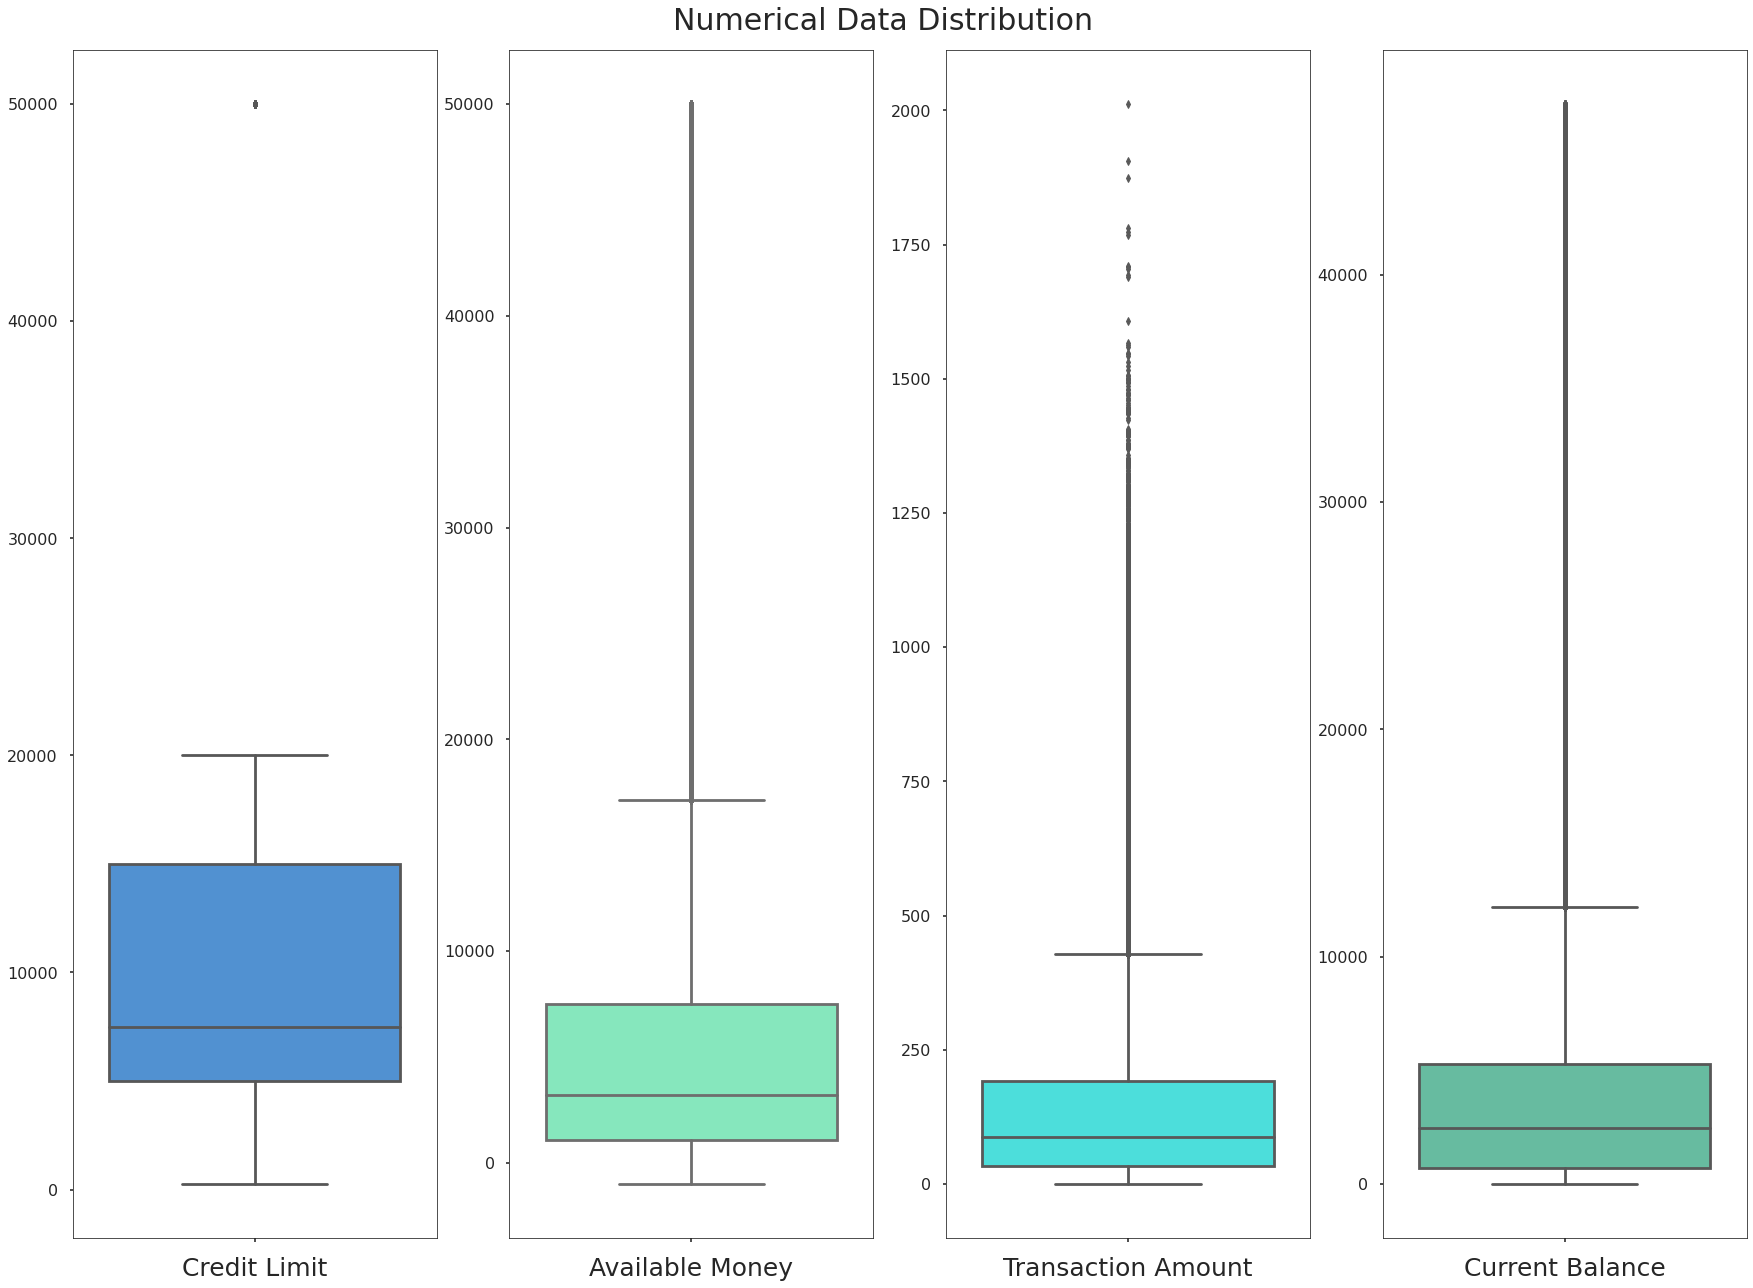

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30,20))

numeric_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
neat_cols = ['Credit Limit', 'Available Money', 'Transaction Amount', 'Current Balance']
colors = ['#3C91E6', '#76F7BF', '#34F6F2', '#59C9A5']

for i in range(len(numeric_cols)):
    sns.boxplot(data=df, x=numeric_cols[i], ax=ax[i], color=colors[i], orient='v')
    ax[i].set_xlabel(neat_cols[i], fontsize=25)
    ax[i].set_ylabel('')
plt.suptitle('Numerical Data Distribution', fontsize=30)
fig.subplots_adjust(top=0.95)

### Credit Limit
* Some really far outliers at credit limit of 50,000

* Also does not seem to have a normal distribution

### Available Money
* Appears to be right skewed

* Interesting to see that available money is so low, I would've expected the general savings to be higher

* More outliers as money increases, which makes sense

### Transaction Amount
* Right skewed

* Seems that the general transaction amount is typically low, which makes sense

* Surprised to see that the maximum transaction amount in this data set is ~2000 -- I expected some larger numbers

### Current Balance
* Right skewed

* Really interesting again that the usual balance for a bank customer is so low.

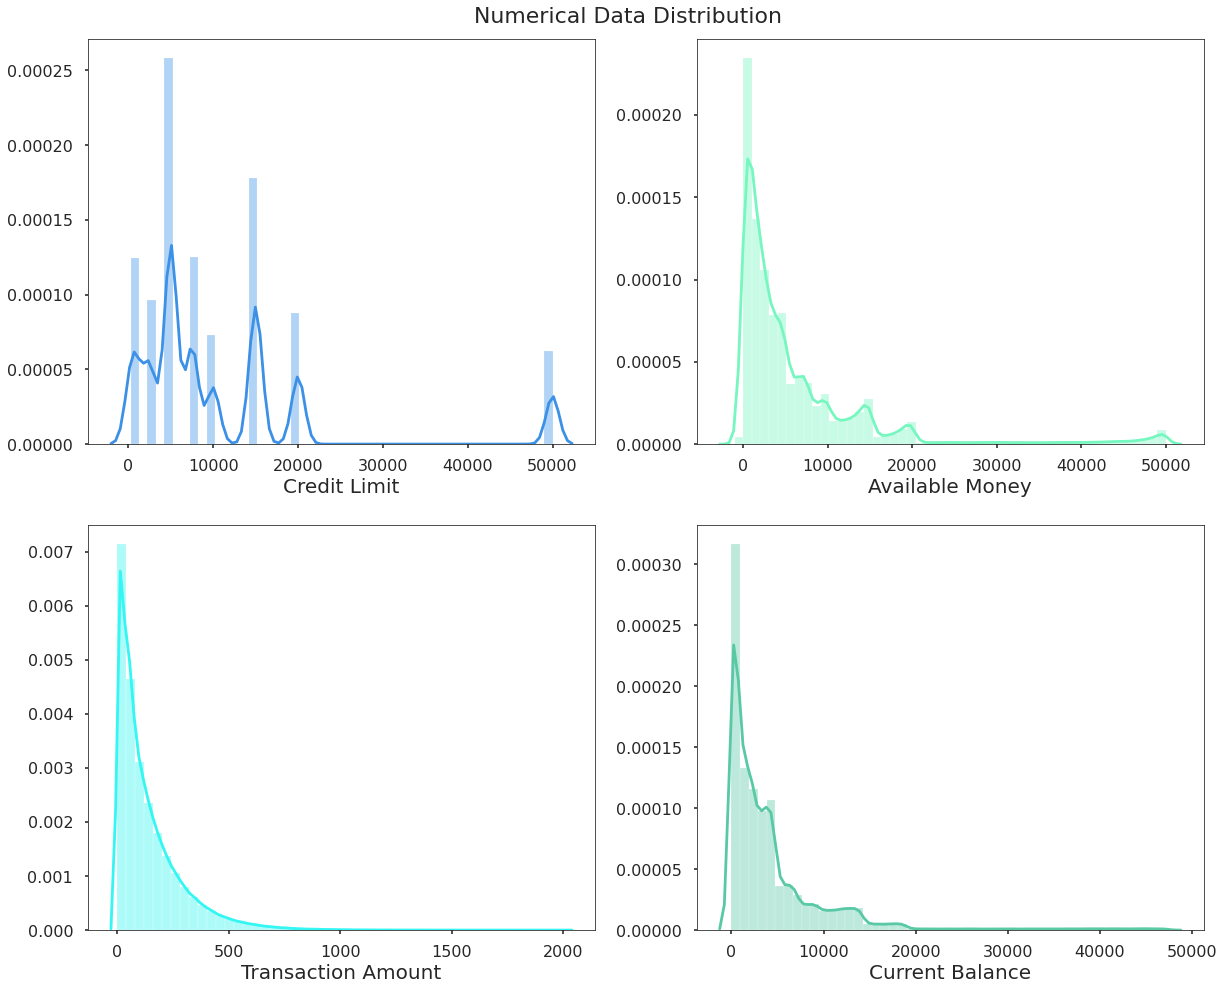

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

numeric_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
neat_cols = ['Credit Limit', 'Available Money', 'Transaction Amount', 'Current Balance']
colors = ['#3C91E6', '#76F7BF', '#34F6F2', '#59C9A5']
counter = 0

for i in range(2):
    for j in range(2):
        sns.distplot(df[numeric_cols[counter]], ax=ax[i][j], color=colors[counter])
        ax[i][j].set_xlabel(neat_cols[counter], fontsize=20)
        ax[i][j].set_ylabel('')
        counter+=1

fig.suptitle('Numerical Data Distribution', fontsize=22)
fig.subplots_adjust(top=0.95)

### Credit Limit
* Data is messier than initially expected. The distribution is multimodal and a simple transformation will not work.

* Ideally if I decide to use this feature, an easy solution would be to use a model that doesn't assume gaussian.

* Makes sense that the distribution is multimodal since it seems like these limit values are predetermined are not random

### Available Money
* Extremely right skewed

### Transaction Amount
* Right skewed
* Behavior of the distribution is really satisfying.
* Not much else to mention

### Current Balance
* Right skewed
* Really interesting again that the usual balance for a bank customer is so low.

## Credit Limit and Transaction Amount

Text(0, 0.5, 'Transaction Amount')

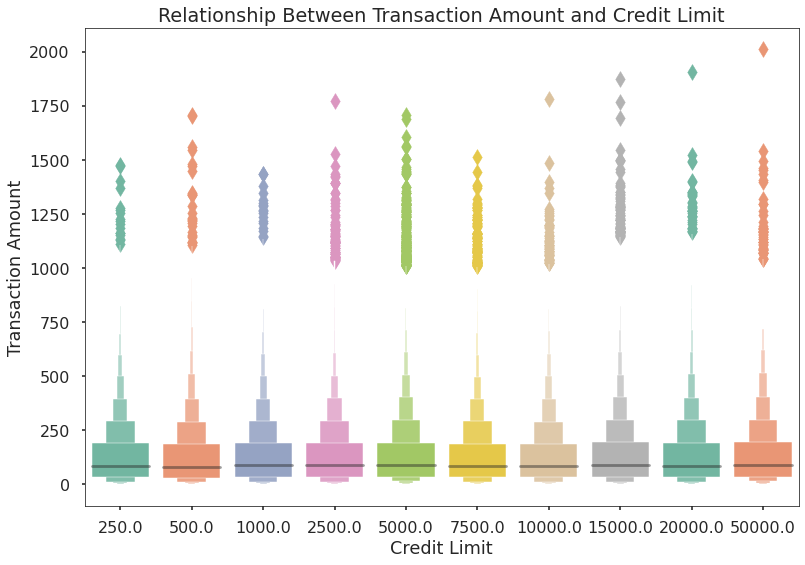

In [6]:
sns.boxenplot(data=df, x='creditLimit', y='transactionAmount', palette='Set2')
plt.title('Relationship Between Transaction Amount and Credit Limit')
plt.xlabel('Credit Limit')
plt.ylabel('Transaction Amount')

* I had an idea that having a higher credit limit would lead to more expensive and more overall transactions, but this does not seem to be the case.

* Perhaps the people with high credit limits are those who are wise with their money and do not spend it recklessly.

## Transaction Amount and Current Balance
* Assuming that people with smaller balances have less expensive and less transactions (I hope)

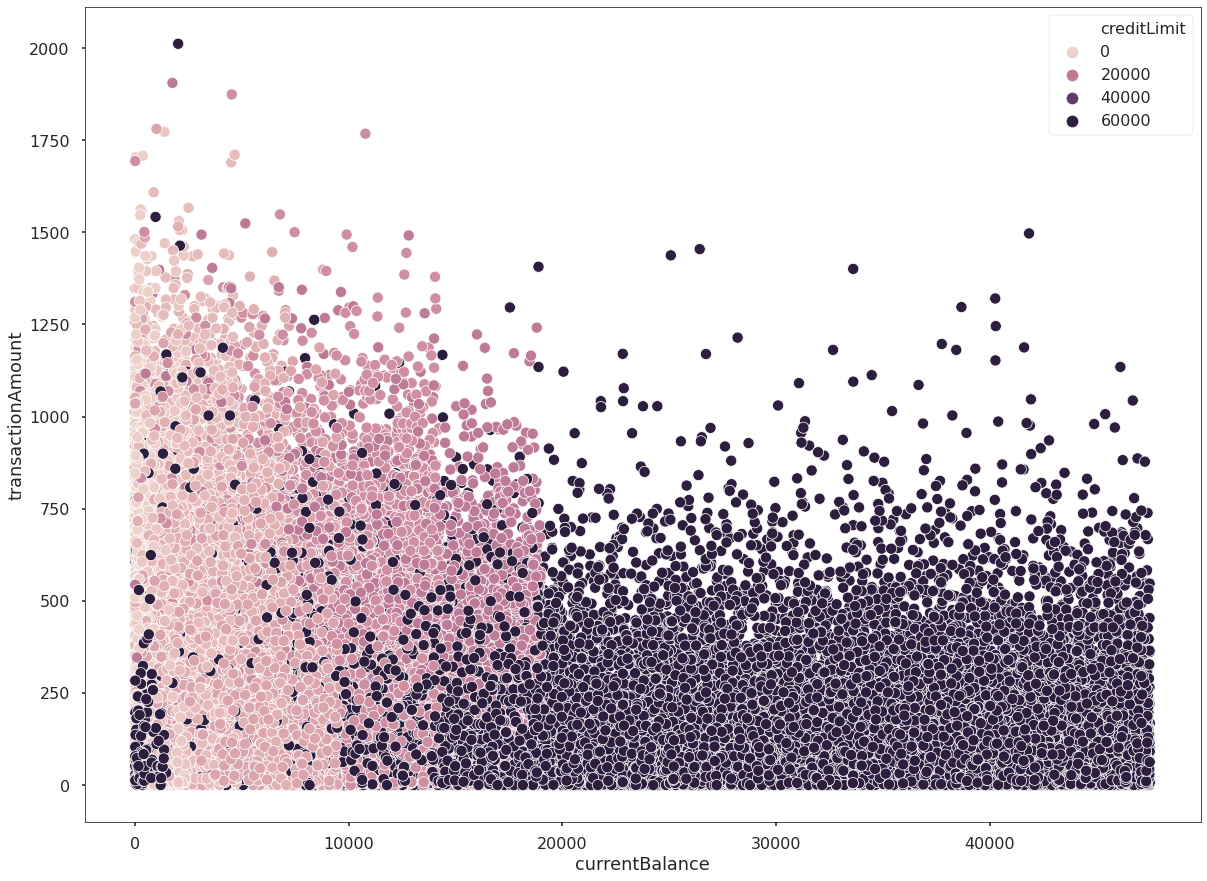

In [7]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=df, x='currentBalance', y='transactionAmount', hue='creditLimit')

* People with larger balances tend to have higher credit limits
* Interesting that some people with really high credit limits have 0 in their current balance
    * I wonder if this is due to messy data or just a real fact -- it will be hard to deal with this in terms of cleaning data


In [8]:
# Resetting fig to default size
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

# Categorical Data

## isFraud

* This is an interesting feature that is conveniently formatted in a way that makes it a good target label.

* While this is only data exploration, I am interested in comparing it to other features to see some differences or similarities.

Text(0, 0.5, 'Count')

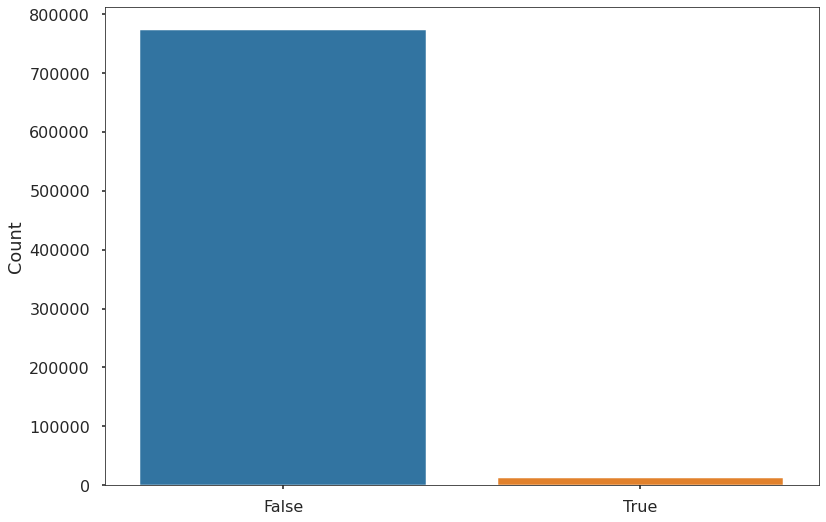

In [9]:
fraud_vals = df['isFraud'].value_counts()

sns.barplot(x=[0,1], y=fraud_vals)
plt.xticks(ticks=[0,1], labels=['False', 'True'])
plt.ylabel('Count')

* Unfortunately the classes are extremely unbalanced. A technique would such as under-sampling would help even out the classes.

* Although it is good that C1 has a minimal amount of fraudulent transactions

Text(0.5, 1.0, 'Comparing Transactions between Fraud and Authentic')

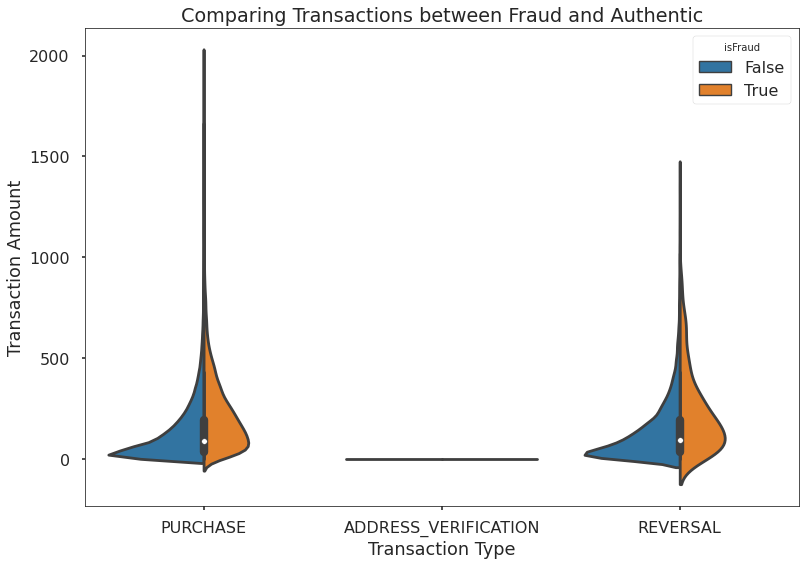

In [10]:
sns.violinplot(data=df, y='transactionAmount', x='transactionType', hue='isFraud', split=True)
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.title('Comparing Transactions between Fraud and Authentic')

* Interesting that fraudulent transactions are typically larger in the amount of money they contain. This does make sense though since the people committing fraudulent transactions are most likely not buying _Tic-Tacs_.

* I also find it interesting that fraudulent transactions are more common in Reversal Transactions. It seems as if it is possible that TRF is a more popular technique for committing fraud.

# Miscellaneous Discoveries

Text(0.5, 1.0, 'Top 20 Accounts with the Most Fraudulent Transactions')

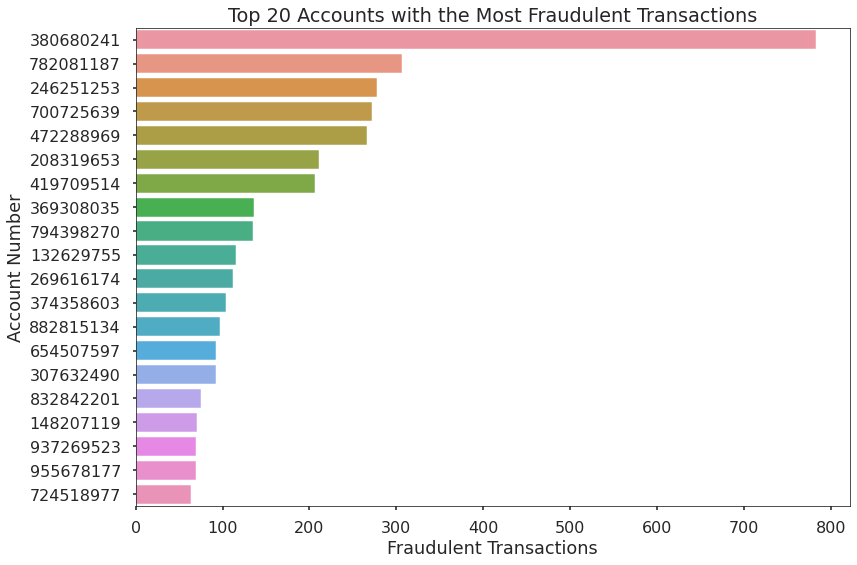

In [11]:
fraud_transactions_only = df[df['isFraud'] == True]

top20_fraudulent_accounts = fraud_transactions_only['accountNumber'].value_counts().head(20)
sns.barplot(y=list(range(20)), x=top20_fraudulent_accounts.values, orient='h')

plt.yticks(ticks=list(range(20)), labels=top20_fraudulent_accounts.index.tolist())
plt.ylabel('Account Number')
plt.xlabel('Fraudulent Transactions')
plt.title('Top 20 Accounts with the Most Fraudulent Transactions')

* I am intrigued by the account number "380680241" as it has a lot of fraudulent transactions

Text(0.5, 1.0, 'Most Popular Merchants of Account 380680241')

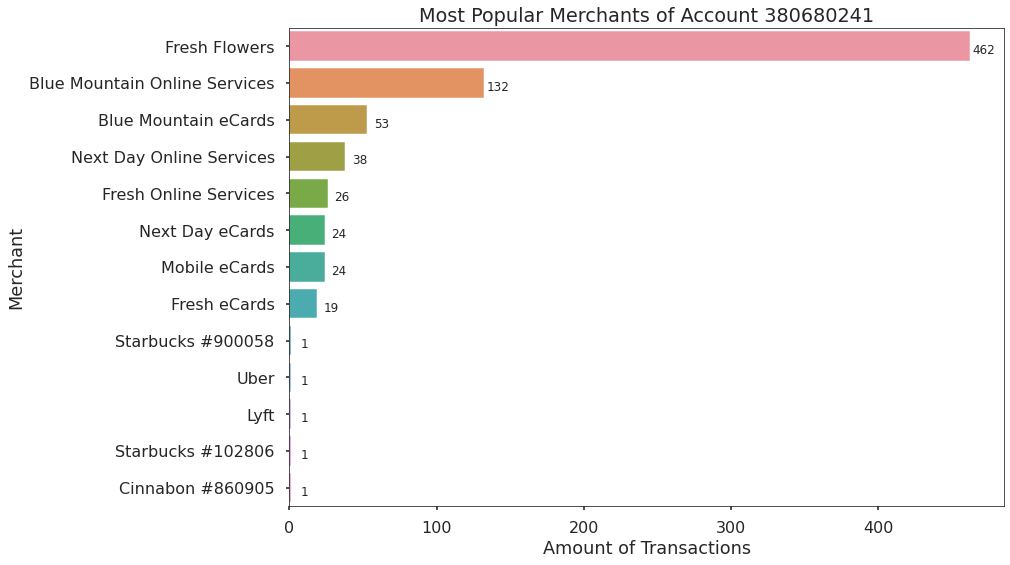

In [12]:
fraud_king = top20_fraudulent_accounts.index[0]

fraud_king_data = df[(df['accountNumber'] == '380680241') & (df['isFraud'] == True)]
fraud_king_top_merchants = fraud_king_data['merchantName'].value_counts()

ax = sns.barplot(y=list(range(len(fraud_king_top_merchants))), x=fraud_king_top_merchants.values, orient='h')
for p in ax.patches:
    width = p.get_width()
    ax.text(width+9.5  ,
        p.get_y()+p.get_height()/2. + 0.2,
        int(width),
        ha="center", fontsize=12)

plt.yticks(ticks=list(range(len(fraud_king_top_merchants))), labels=fraud_king_top_merchants.index.tolist())
plt.xlabel('Amount of Transactions')
plt.ylabel('Merchant')
plt.title('Most Popular Merchants of Account 380680241')

* The flower transactions I am unsure of, but it's interesting to see what kind of fraudulent transactions people make.

* The eCards make sense since that's probably a way to earn the money.